In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
import eval_util
import os
import pred_util
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

Using TensorFlow backend.


In [3]:
def show_log(dir_name, fold='1',col=None, show_params=True):
    log_file_path = '/data/pneumo_log/val_' +fold + '/' + dir_name + '/training.log'
    log = pd.read_csv(log_file_path)
    if col is not None:
        log = log[col]
    log.plot(x='epoch')
#     if show_params:
#         show_train_params(dir_name)
    return log

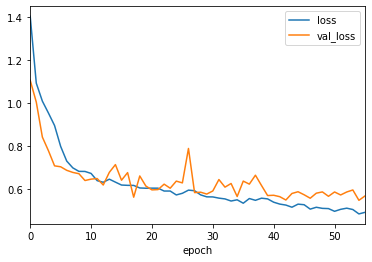

In [4]:
log = show_log('2019_0810_2118',fold='1',col=['loss', 'val_loss','epoch'])


In [5]:
best_index = log['val_loss'].idxmin()
log.iloc[best_index]

loss         0.483583
val_loss     0.546966
epoch       54.000000
Name: 54, dtype: float64

In [6]:
cols = ['epoch',
      'dice_coef_flat',
      'val_dice_coef_flat',
      'val_dice_coef',
      'dice_coef']


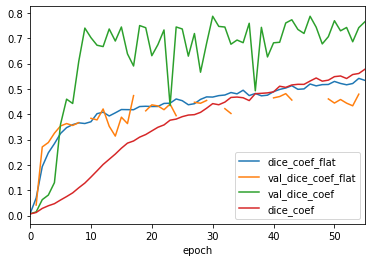

In [8]:
log = show_log('2019_0810_2118',fold='1',col=cols)


In [9]:
best_index = log['val_dice_coef_flat'].idxmax()
log.iloc[best_index]

epoch                 42.000000
dice_coef_flat         0.503831
val_dice_coef_flat     0.481466
val_dice_coef          0.760425
dice_coef              0.506278
Name: 42, dtype: float64

In [10]:

pred_util._save_preds(model_path='/data/pneumo_log/val_1/2019_0810_2118/best_weights.hdf5', data_path='/data/pneumo/fold/1/')


Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.


  0%|          | 0/2135 [00:00<?, ?it/s]

saving dirs: /data/pneumo_log/val_1/val_predictions/2019_0810_2118/


100%|██████████| 2135/2135 [07:32<00:00,  5.83it/s]


In [12]:
pred_data_dir='/data/pneumo_log/val_1/val_predictions/2019_0810_2118/'
df= eval_util.eval_all_pred(pred_data_dir='/data/pneumo_log/val_1/val_predictions/2019_0810_2118/')
df.groupby('thresh').mean()

100%|██████████| 2135/2135 [01:50<00:00, 19.27it/s]


,score,aug_score,mean_score
thresh,,,
0.00,0.005555,0.005555,0.005555
0.05,0.799188,0.722160,0.755830
0.10,0.799534,0.724460,0.758464
0.15,0.800546,0.726292,0.760120
0.20,0.800666,0.726738,0.760826
0.25,0.800833,0.727658,0.761965
0.30,0.801006,0.727645,0.761696
0.35,0.800706,0.728569,0.761781
0.40,0.800811,0.728546,0.762305


In [9]:
data_path=glob('/data/pneumo/fold/1/*.npy')

In [11]:
data_path = data_path[0]

In [13]:
d = np.load(data_path)[()]
img = d['img']

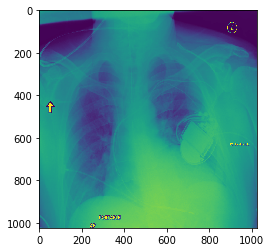

In [16]:
plt.imshow(img)

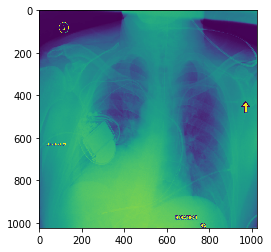

In [19]:
img_fl = np.flip(img, axis=-1)
plt.imshow(img_fl)

In [21]:
np.mean((img, img_fl))

120.1018762588501

In [23]:
d = {"a":1, "b":2}

In [25]:
'a' in d.keys()

True